In [ ]:
from sklearn.naive_bayes import MultinomialNB
import sklearn.datasets as datasets
import numpy as np

In [ ]:
train_images = np.loadtxt('data/train_images.txt')
train_labels = np.loadtxt('data/train_labels.txt').astype(np.int)

test_images = np.loadtxt('data/test_images.txt')
test_labels = np.loadtxt('data/test_labels.txt').astype(np.int)

In [ ]:
bins = np.linspace(start = 150, stop = 190, num = 4, endpoint = False)
print(bins)
data = [(160,"F"), (165, "F"), (155, "F"), (172, "F"), (175, "B"), (180, "B"), (177, "B"), (190, "B")]

f = [i for (i,j) in data if j == "F"]
b = [i for (i,j) in data if j == "B"]

print(f, b)

f_to_bins = np.digitize(f,bins)
b_to_bins = np.digitize(b,bins)

print(f_to_bins, b_to_bins)

f178 = len([i for i in f_to_bins if i == 3])
b178 = len([i for i in b_to_bins if i == 3])

p_f = f178 / (f178 + b178)
p_b = b178 / (f178 + b178)
print(p_f)
print(p_b)

[150. 160. 170. 180.]
[160, 165, 155, 172] [175, 180, 177, 190]
[2 2 1 3] [3 4 3 4]
0.3333333333333333
0.6666666666666666


In [ ]:
num_bins = 5
bins = np.linspace(start=0, stop=255, num=num_bins)

print(bins)

def values_to_bins(x, bins):
    x_to_bins = np.digitize(x, bins)
    return x_to_bins - 1

x_train = values_to_bins(train_images, bins)
x_test = values_to_bins(test_images, bins)

print(x_train.min())
print(x_train.max())

[  0.    63.75 127.5  191.25 255.  ]
0
4


In [ ]:
num_bins = 5

bins = np.linspace(start=0, stop=255, num=num_bins)

naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(x_train, train_labels)

# p = naive_bayes_model.predict(x_test)
accuracy = naive_bayes_model.score(x_test, test_labels)

print(accuracy)

0.836


In [ ]:
for num_bins in [3, 5, 7, 9, 11]:
    bins = np.linspace(0, 255, num=num_bins)

    train = values_to_bins(train_images, bins)
    test = values_to_bins(test_images, bins)

    naive_bayes_model = MultinomialNB()

    naive_bayes_model.fit(train, train_labels)
    score = naive_bayes_model.score(test, test_labels)
    print(num_bins, score)

3 0.826
5 0.836
7 0.842
9 0.842
11 0.842


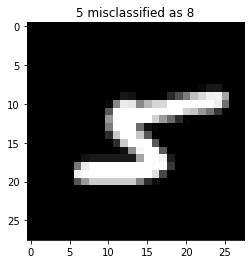

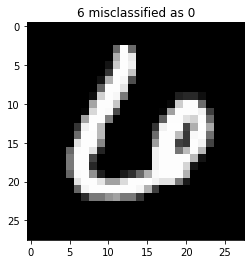

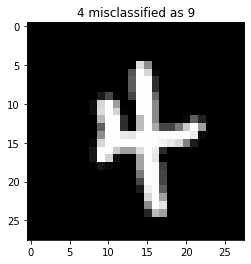

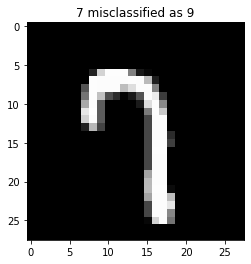

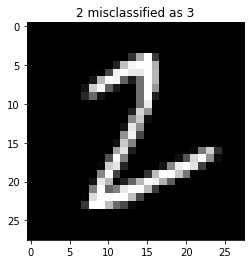

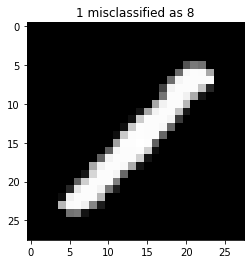

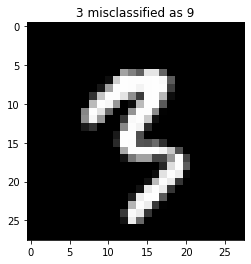

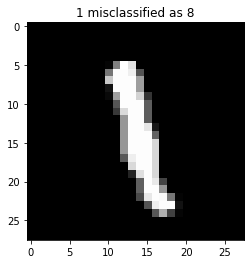

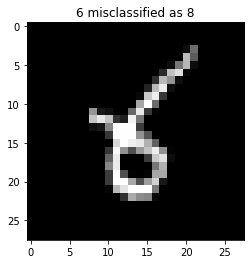

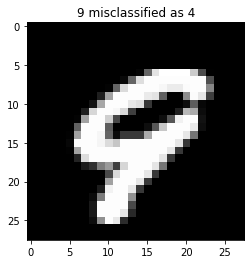

In [ ]:
def values_to_bins(x, bins):
    x_to_bins = np.digitize(x, bins)
    return x_to_bins-1
scores = []
for num_bins in [3, 5, 7, 9, 11]:
    bins = np.linspace(0, 255, num = num_bins)
    train = values_to_bins(train_images, bins)
    test = values_to_bins(test_images, bins)
    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(train, train_labels)
    score = naive_bayes_model.score(test, test_labels)
    scores.append(score)
nrs = [3, 5, 7, 9, 11]

# max = nrs[scores.index(max(scores))]
bins = np.linspace(0, 255, num = 7)
train = values_to_bins(train_images, bins)
test = values_to_bins(test_images, bins)
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(train, train_labels)
p = naive_bayes_model.predict(test_images)
nr = 0
for i in range(len(p)):
    if nr >= 10:
        break
    if p[i] != test_labels[i]:
        nr+=1
        image = test_images[i]
        image = np.reshape(image, (28, 28))
        plt.title(f'{test_labels[i]} misclassified as {p[i]}')
        plt.imshow(image.astype(np.uint8), cmap='gray')
        plt.show()
#plt.show()

In [ ]:
def confusion_matrix(test_labels,predict_labels):
    # matrix = [[0 for _ in range(10)] for _ in range(10)]
    matrix = np.zeros((10, 10))
    for i in range(len(test_labels)):
        matrix[test_labels[i]][predict_labels[i]] += 1
    return matrix

confusion_matrix(test_labels, p)

array([[51.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.],
       [ 0., 48.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  0.],
       [ 2.,  0., 51.,  1.,  1.,  0.,  0.,  1.,  1.,  1.],
       [ 0.,  0.,  1., 49.,  0.,  0.,  0.,  0.,  0.,  3.],
       [ 0.,  0.,  0.,  0., 34.,  0.,  0.,  0.,  2., 10.],
       [ 1.,  0.,  0.,  9.,  0., 35.,  1.,  0.,  5.,  1.],
       [ 1.,  1.,  0.,  0.,  1.,  0., 43.,  0.,  2.,  0.],
       [ 0.,  1.,  0.,  0.,  2.,  0.,  0., 41.,  0.,  6.],
       [ 0.,  1.,  3.,  3.,  1.,  1.,  1.,  1., 34.,  1.],
       [ 0.,  0.,  1.,  1.,  5.,  0.,  0.,  0.,  0., 35.]])

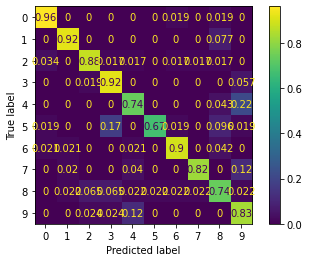

In [ ]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(naive_bayes_model, test, y_true=test_labels, normalize='true')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data = datasets.load_iris()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.20, random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

In [ ]:
model.predict(X_test) # predictions

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 1,
       0, 2, 1, 2, 2, 2, 0, 0])

In [ ]:
model.score(X_test, y_test) # accuracy

0.9

In [ ]:
ex1=0
k=0
for i in vect:
    if i[0]>=171:
        if i[0]<=180:
            if i[1]=='B':
                ex1+=1
            k+=1
print(ex1/k)

In [ ]:
bins = np.linspace(start = 150.1, stop=190.1, num=4, endpoint=False)
print(bins)
data = [(160,"F"), (165, "F"), (155, "F"), (172, "F"), (175, "B"), (180, "B"), (177, "B"), (190, "B")]

f = [i for (i,j) in data if j == "F"]
b = [i for (i,j) in data if j == "B"]

print(f, b)

f_to_bins = np.digitize(f, bins)
b_to_bins = np.digitize(b, bins)
n_f_178 = len([i for i in f_to_bins if i == 3])
n_b_178 = len([i for i in b_to_bins if i == 3])
p_f_178 = n_f_178 / (n_f_178 + n_b_178)
p_b_178 = n_b_178 / (n_f_178 + n_b_178)
print(p_f_178)
print(p_b_178)

[150.1 160.1 170.1 180.1]
[160, 165, 155, 172] [175, 180, 177, 190]
0.25
0.75


In [ ]:
training_set = [(160, 'F'), (165, 'F'), (155, 'F'), (172, 'F'),
                (175, 'B'), (180, 'B'), (177, 'B'), (190, 'B')]
data = [i for (i, j) in training_set]
labels = [j for(i, j) in training_set]

bins = np.linspace(start=150 , stop=190 , num=4, endpoint=False)
print(bins)
data = np.digitize(data, bins)

print([j for i, j in training_set])
print(data)

def calc_prob(vec, id):
  return len([i for i in vec if i == id]) / len(vec)

def calc_cond_prob(gender, bin):
  restr_data = [data[i] for i in range(len(labels)) if labels[i] == gender]
  return calc_prob(restr_data, bin)

def solve(height, gender):
  cores_bin = np.digitize(height, bins)
  print(cores_bin, calc_cond_prob(gender, cores_bin), calc_prob(labels, gender), calc_prob(data, cores_bin))
  return calc_prob(labels, gender) * calc_cond_prob(gender, cores_bin) / calc_prob(data, cores_bin)

height = 177
print('Prob ca o pers de', height, 'sa fie fata:', solve(height, 'F'))
print('Prob ca o pers de', height, 'sa fie baiat:', solve(height, 'B'))

[150. 160. 170. 180.]
['F', 'F', 'F', 'F', 'B', 'B', 'B', 'B']
[2 2 1 3 3 4 3 4]
3 0.25 0.5 0.375
Prob ca o pers de 177 sa fie fata: 0.3333333333333333
3 0.5 0.5 0.375
Prob ca o pers de 177 sa fie baiat: 0.6666666666666666


In [ ]:
# train_images = np.load('data/train_images.txt', allow_pickle=True)
# test_images = np.load('data/test_images.txt')
# train_labels = np.load('data/train_labels.txt', allow_pickle=True)
# test_labels = np.load('data/test_labels.txt')

OSError: ignored

In [ ]:
def read_labels(path):
    with open(path) as f:
        lines = f.readlines()
        numbs = []
        for l in lines:
            numbs.append(float(l))
        return np.array(numbs)

def read_images(path):
    with open(path) as f:
        lines = f.readlines()
        numbs = []
        for l in lines:
            numbers = [float(x) for x in l.split(' ')]
            numbs.append(numbers)
        return np.array(numbs)

    
train_images = read_images('data/train_images.txt')
test_images = read_images('data/test_images.txt')
print(train_images.shape)
print(train_images.shape)

    
train_labels = read_labels('data/train_labels.txt')
test_labels = read_labels('data/test_labels.txt')
print(train_labels.shape)
print(test_labels.shape)

(1000, 784)
(1000, 784)
(1000,)
(500,)


In [ ]:
num_bins = 5
bins = np.linspace(start=0, stop=255, num=num_bins)

def values_to_bins(x, bins):
    x_to_bins = np.digitize(x, bins)
    return x_to_bins - 1

x_train = values_to_bins(train_images, bins)
x_test = values_to_bins(test_images, bins)

print(x_train.shape)
print(x_train.mean())

(1000, 784)
0.39563265306122447


In [ ]:
num_bins = 5
bins = np.linspace(start=0, stop=255, num=num_bins, endpoint=False)

train_images_dig = values_to_bins(train_images, bins)
test_images_dig = values_to_bins(test_images, bins)

naive_bayes = MultinomialNB()
naive_bayes.fit(train_images_dig, train_labels)
naive_bayes.score(test_images_dig, test_labels)

0.84

In [ ]:
num_bins = 5
for num_bins in range(3, 12, 2):
    bins = np.linspace(0, 255, num=num_bins)
    x_train = values_to_bins(train_images, bins)
    x_test = values_to_bins(test_images, bins)
    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(x_train, train_labels)
    print(num_bins, naive_bayes_model.score(x_test, test_labels))

3 0.826
5 0.836
7 0.842
9 0.842
11 0.842


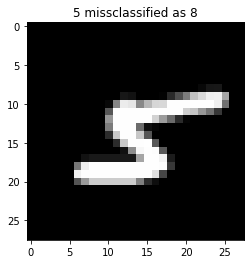

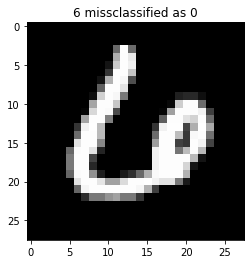

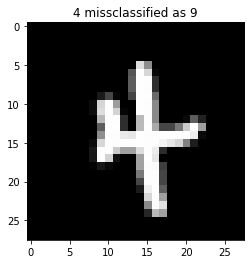

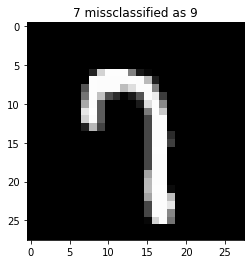

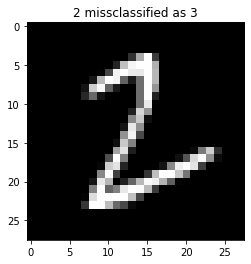

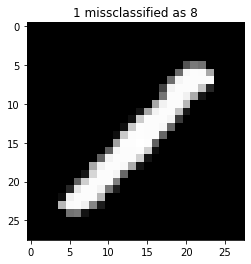

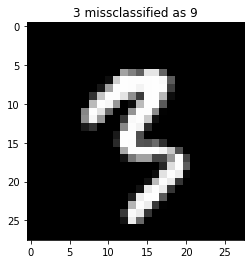

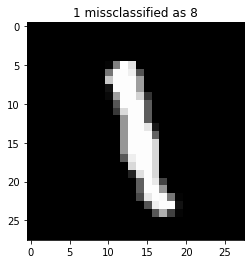

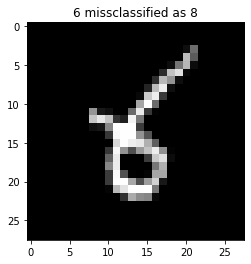

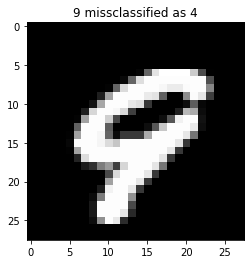

In [ ]:
import matplotlib.pyplot as plt

num_bins = 7

train_images_dig = values_to_bins(train_images, bins)
test_images_dig = values_to_bins(test_images, bins)

naive_bayes_model = MultinomialNB()

naive_bayes_model.fit(train_images_dig, train_labels)

p = naive_bayes_model.predict(test_images_dig)
score = naive_bayes_model.score(test_images_dig, test_labels)

count = 10
for i in range(len(p)):
    if count == 0:
        break
    if p[i] != test_labels[i]:
        plt.imshow(test_images[i].reshape(28, 28), cmap='gray') # print(i)
        # plt.title(str(int(test_labels[i])), 'missclassified as', str(int(p[i])))
        plt.title('{} missclassified as {}'.format(int(test_labels[i]), int(p[i])))
        plt.show()
        count -= 1